In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


Introduction to the project and and analyses of all the parameters in the dataset

In [6]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
data.shape

(918, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
data.rename({'ChestPainType':'cpt', 'RestingBP':'bp', 'Cholesterol': 'chol', 'FastingBS':'fbs', 'RestingECG':'ecg', 'ExerciseAngina':'exang', 'ST_Slope':'sop'}, inplace = True, axis = 1)

In [11]:
data.head()

,Age,Sex,cpt,bp,chol,fbs,ecg,MaxHR,exang,Oldpeak,sop,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


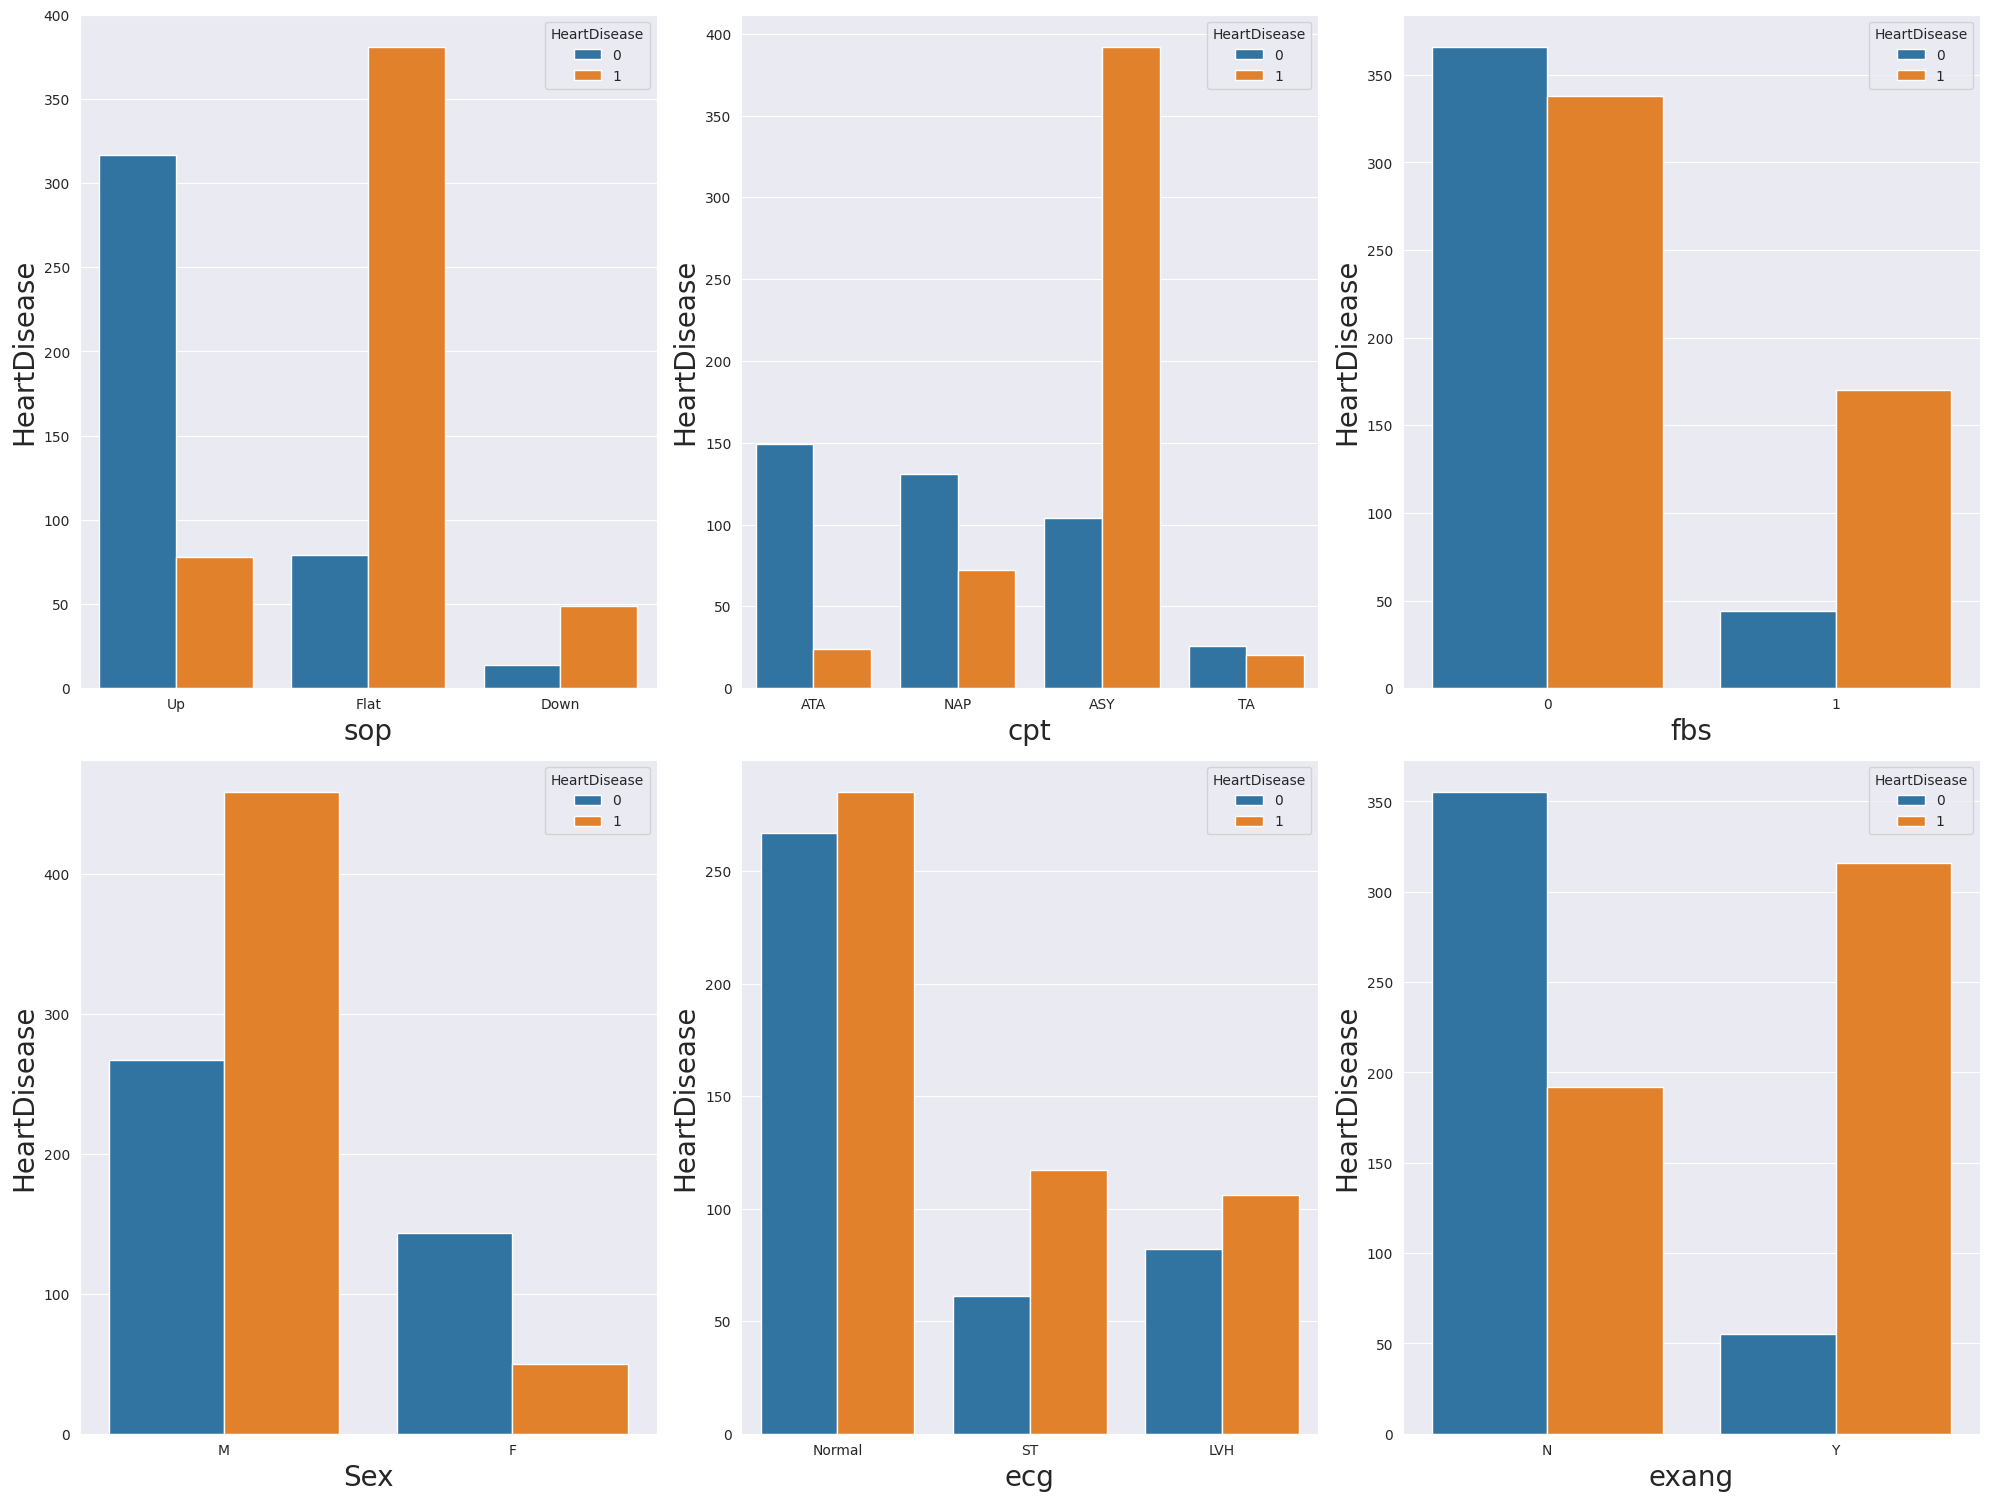

In [12]:
categorical = data[['sop','cpt','fbs','Sex','ecg','exang']]
sns.set_style('darkgrid')
plt.figure(figsize=(20,22), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in categorical: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=9 :     # set the limit
        ax = plt.subplot(3,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count  
        sns.countplot(x=categorical[column],hue=data.HeartDisease) # it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) # assigning name to x-axis and font size is 20
        plt.ylabel('HeartDisease',fontsize=20) # assigning name to y-axis and font size is 20
    plotnumber+=1 # increment of plotnumber 
plt.tight_layout()
plt.show()

observation based on the graphs above

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

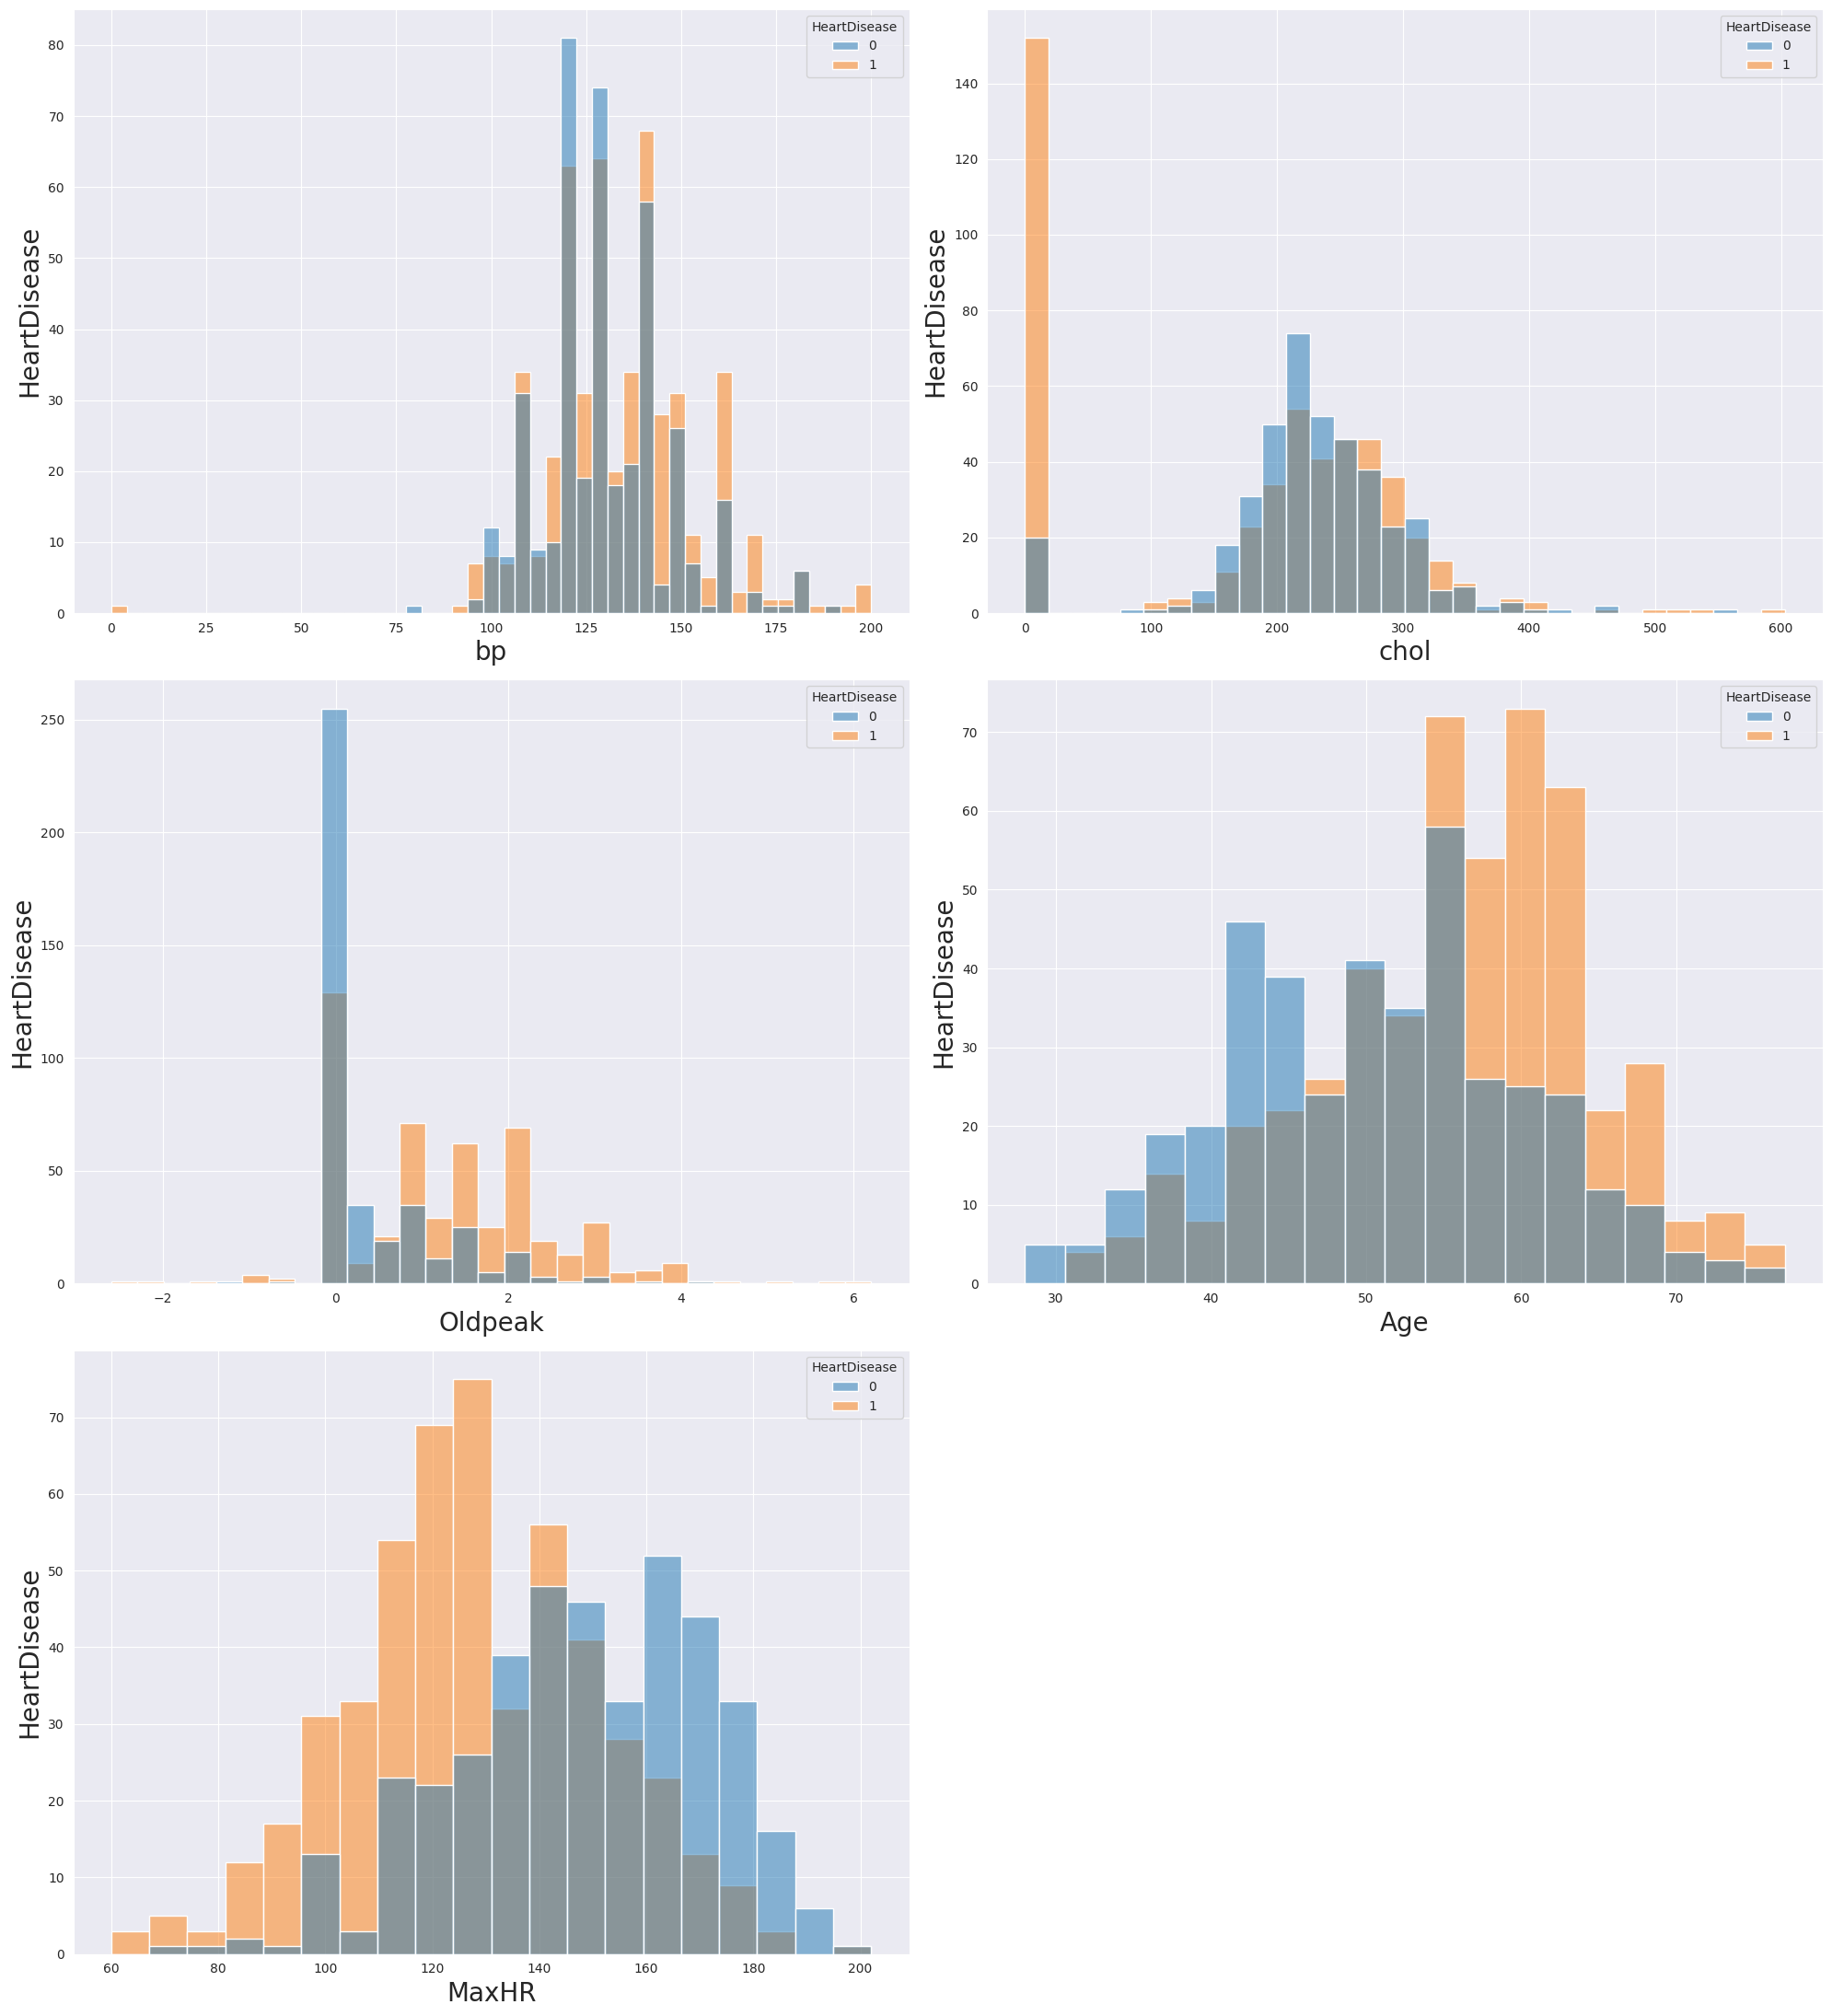

In [13]:
numerical = data[['bp','chol','Oldpeak','Age','MaxHR']]
sns.set_style('darkgrid')
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in numerical: # iteration of columns / acessing the columns from  dataset 
    if plotno<=9:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 5 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.histplot(x=numerical[column],hue=data.HeartDisease) # it give frequency hue =value counts
        plt.ylabel('HeartDisease',fontsize=20)# assigning name to y-axis and font size is 20
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() 

Observations based on the graphs

Multivariate  analysis below

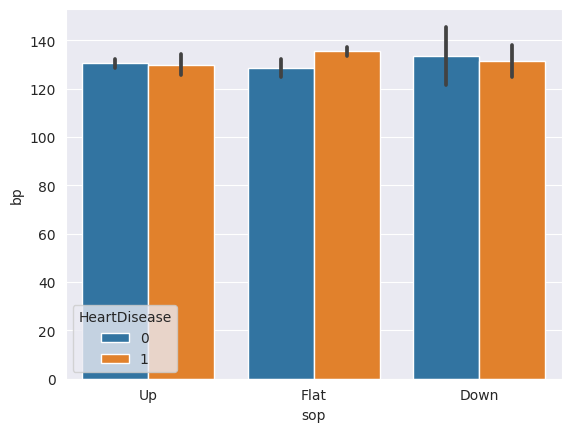

In [14]:
sns.barplot(x='sop',y='bp',hue=data.HeartDisease,data=data)
plt.show()

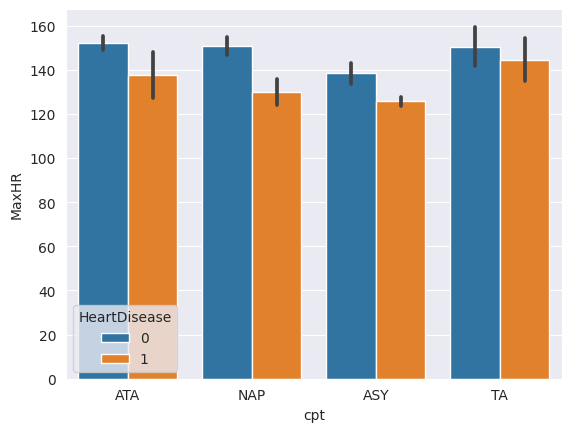

In [15]:
sns.barplot(x='cpt',y='MaxHR',hue=data.HeartDisease,data=data)
plt.show()

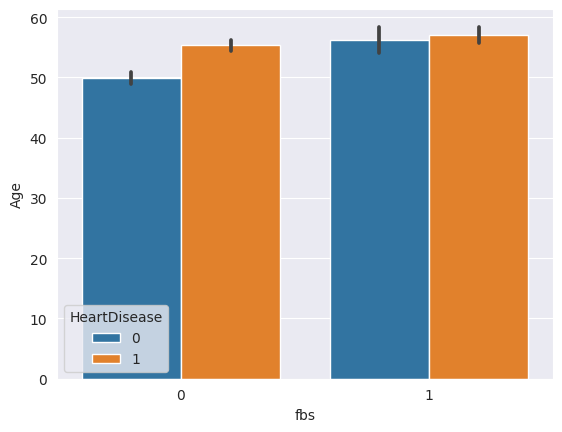

In [16]:
sns.barplot(x='fbs',y='Age',hue=data.HeartDisease,data=data)
plt.show()

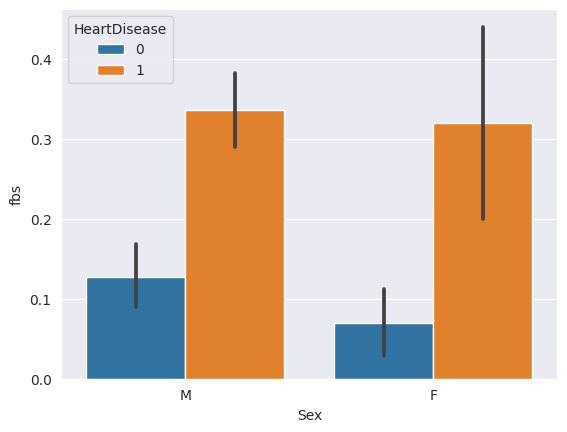

In [17]:
sns.barplot(x='Sex',y='fbs',hue=data.HeartDisease,data=data)
plt.show()

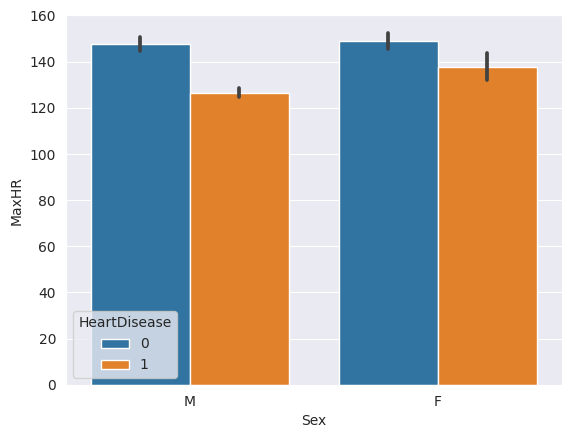

In [18]:
sns.barplot(x='Sex',y='MaxHR',hue=data.HeartDisease,data=data)
plt.show()

Observations based on the following graphs

Data preprocessing / feature engineering below

In [19]:
data.isnull().sum()

Age             0
Sex             0
cpt             0
bp              0
chol            0
fbs             0
ecg             0
MaxHR           0
exang           0
Oldpeak         0
sop             0
HeartDisease    0
dtype: int64

In [20]:
data.Sex.value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

Handling Outlier

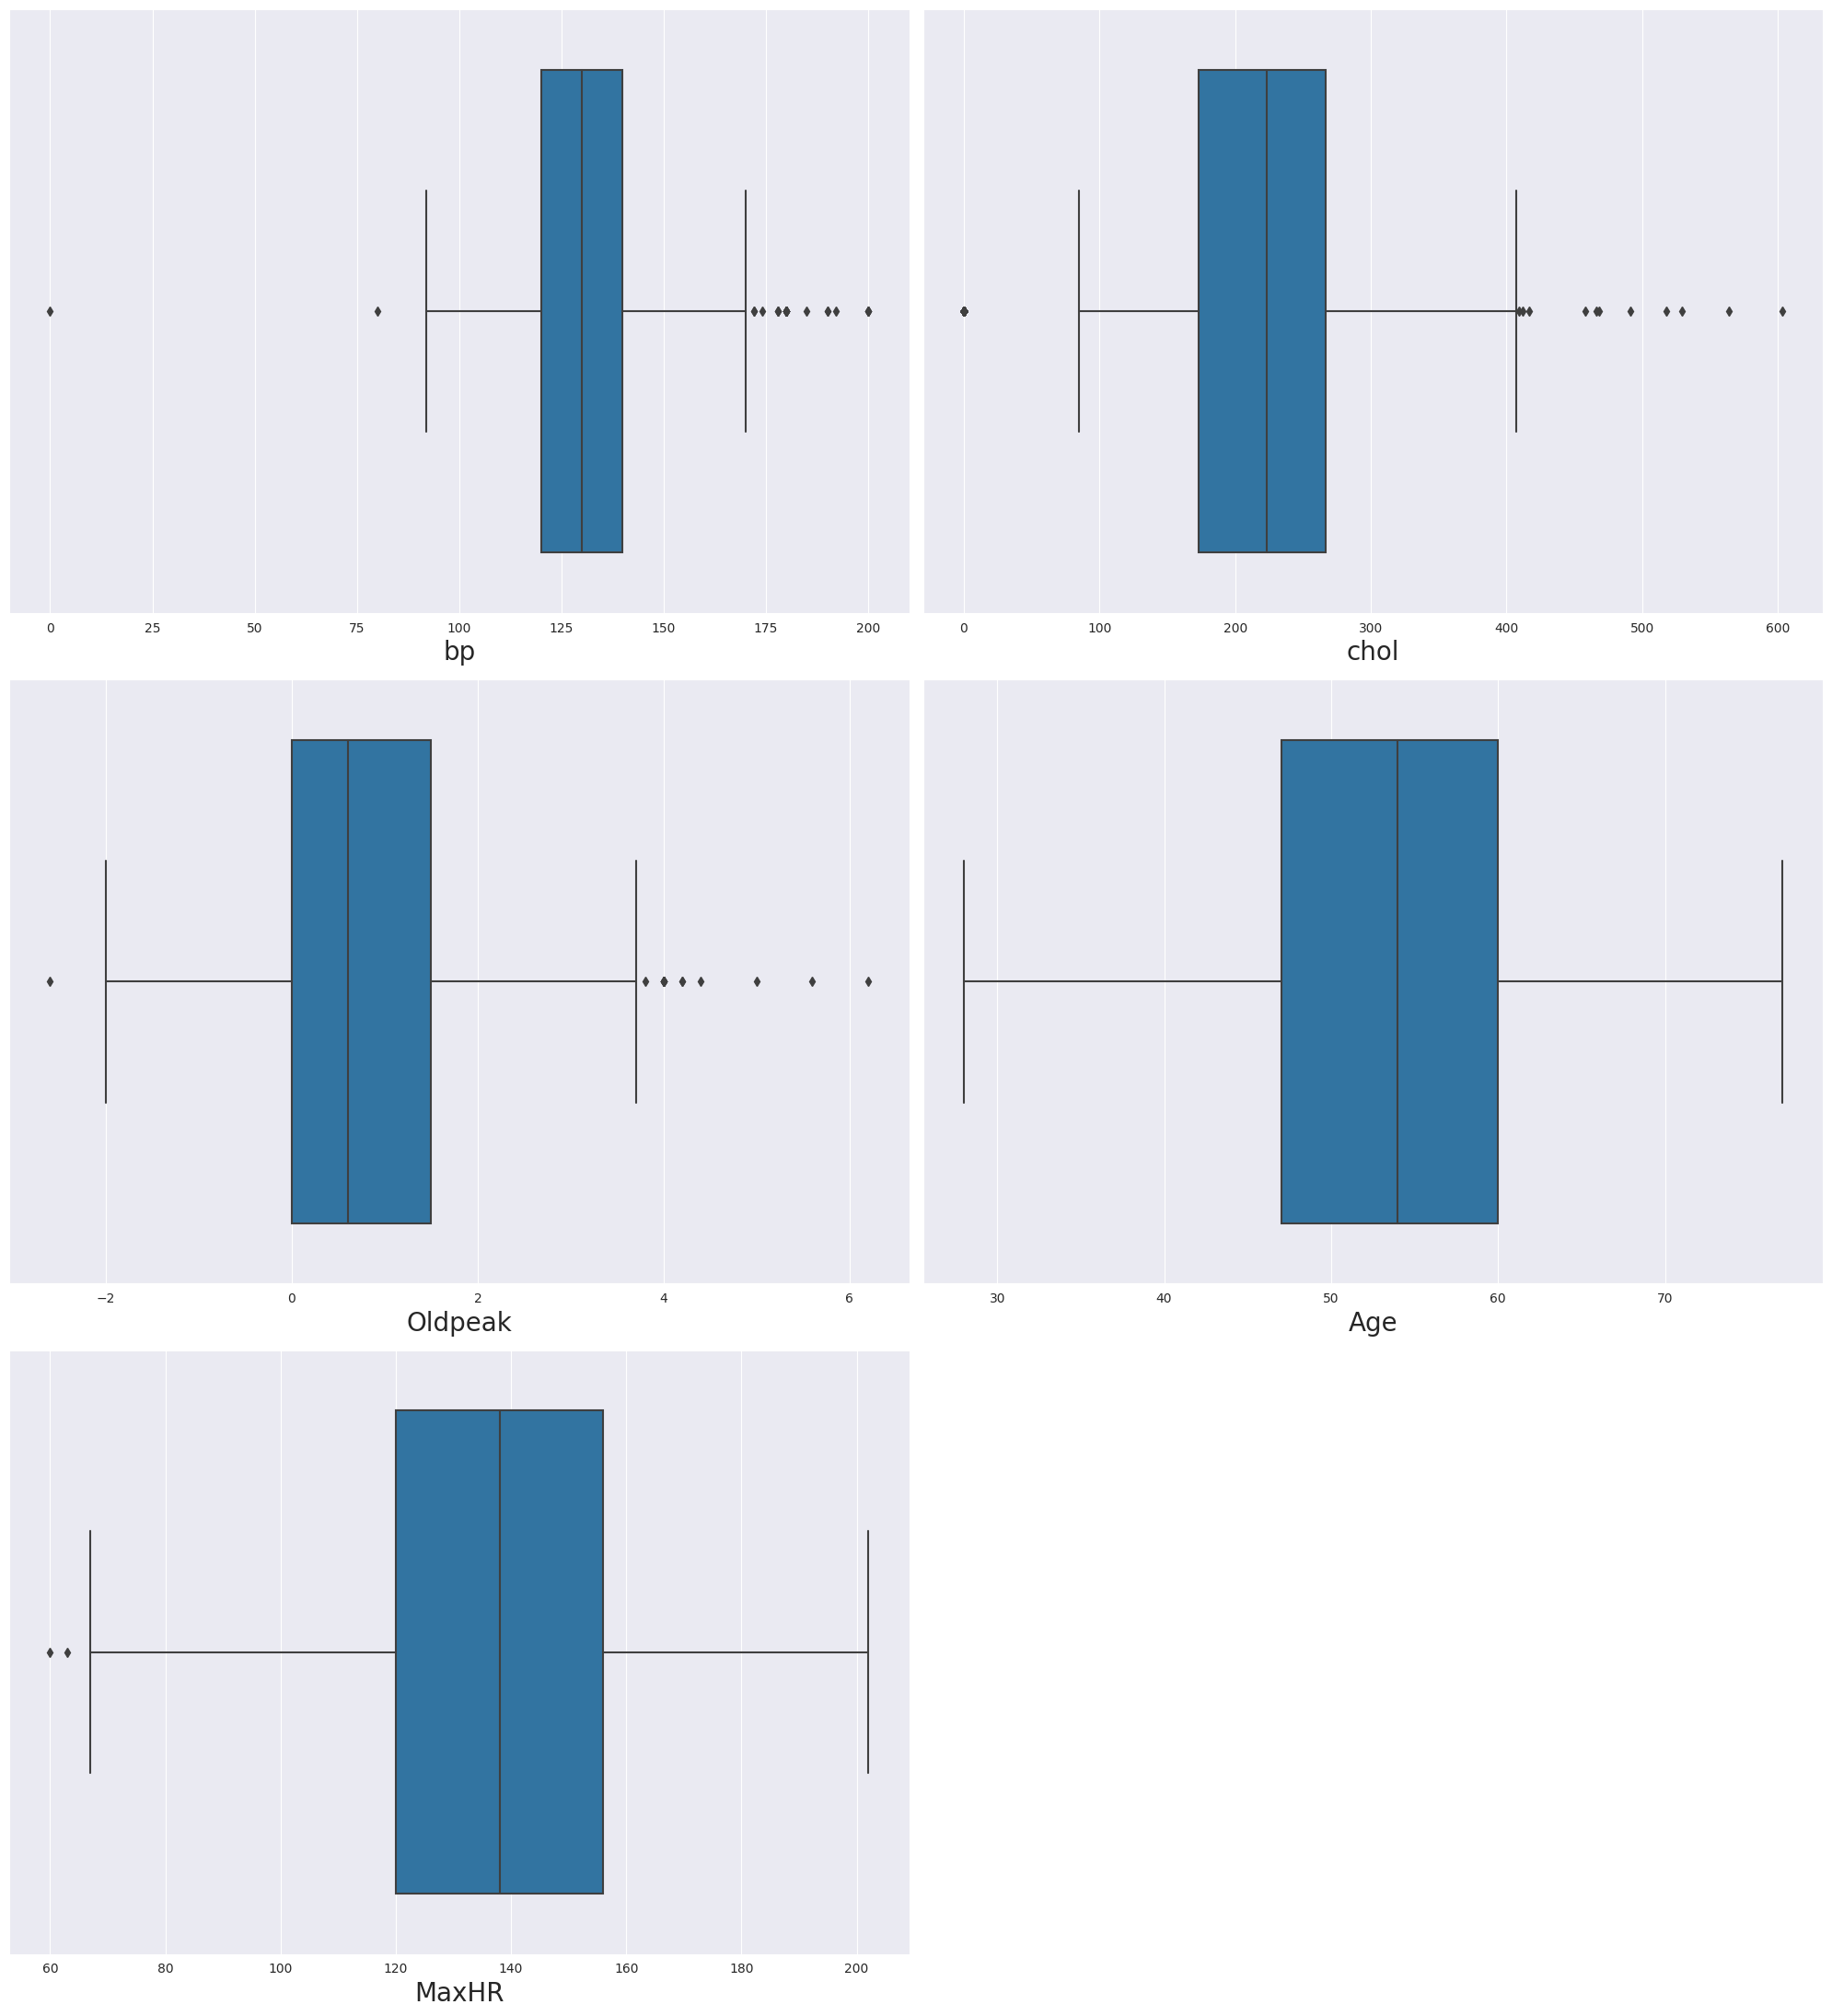

In [21]:
out = data[['bp','chol','Oldpeak','Age','MaxHR']]
sns.set_style('darkgrid')
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from  dataset 
    if plotno<=6:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 5 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.boxplot(x=out[column]) # Plotting box plots
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()

/tmp/ipykernel_18/1705271589.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=out[column]) # Plotting dist plots
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/1705271589.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for 

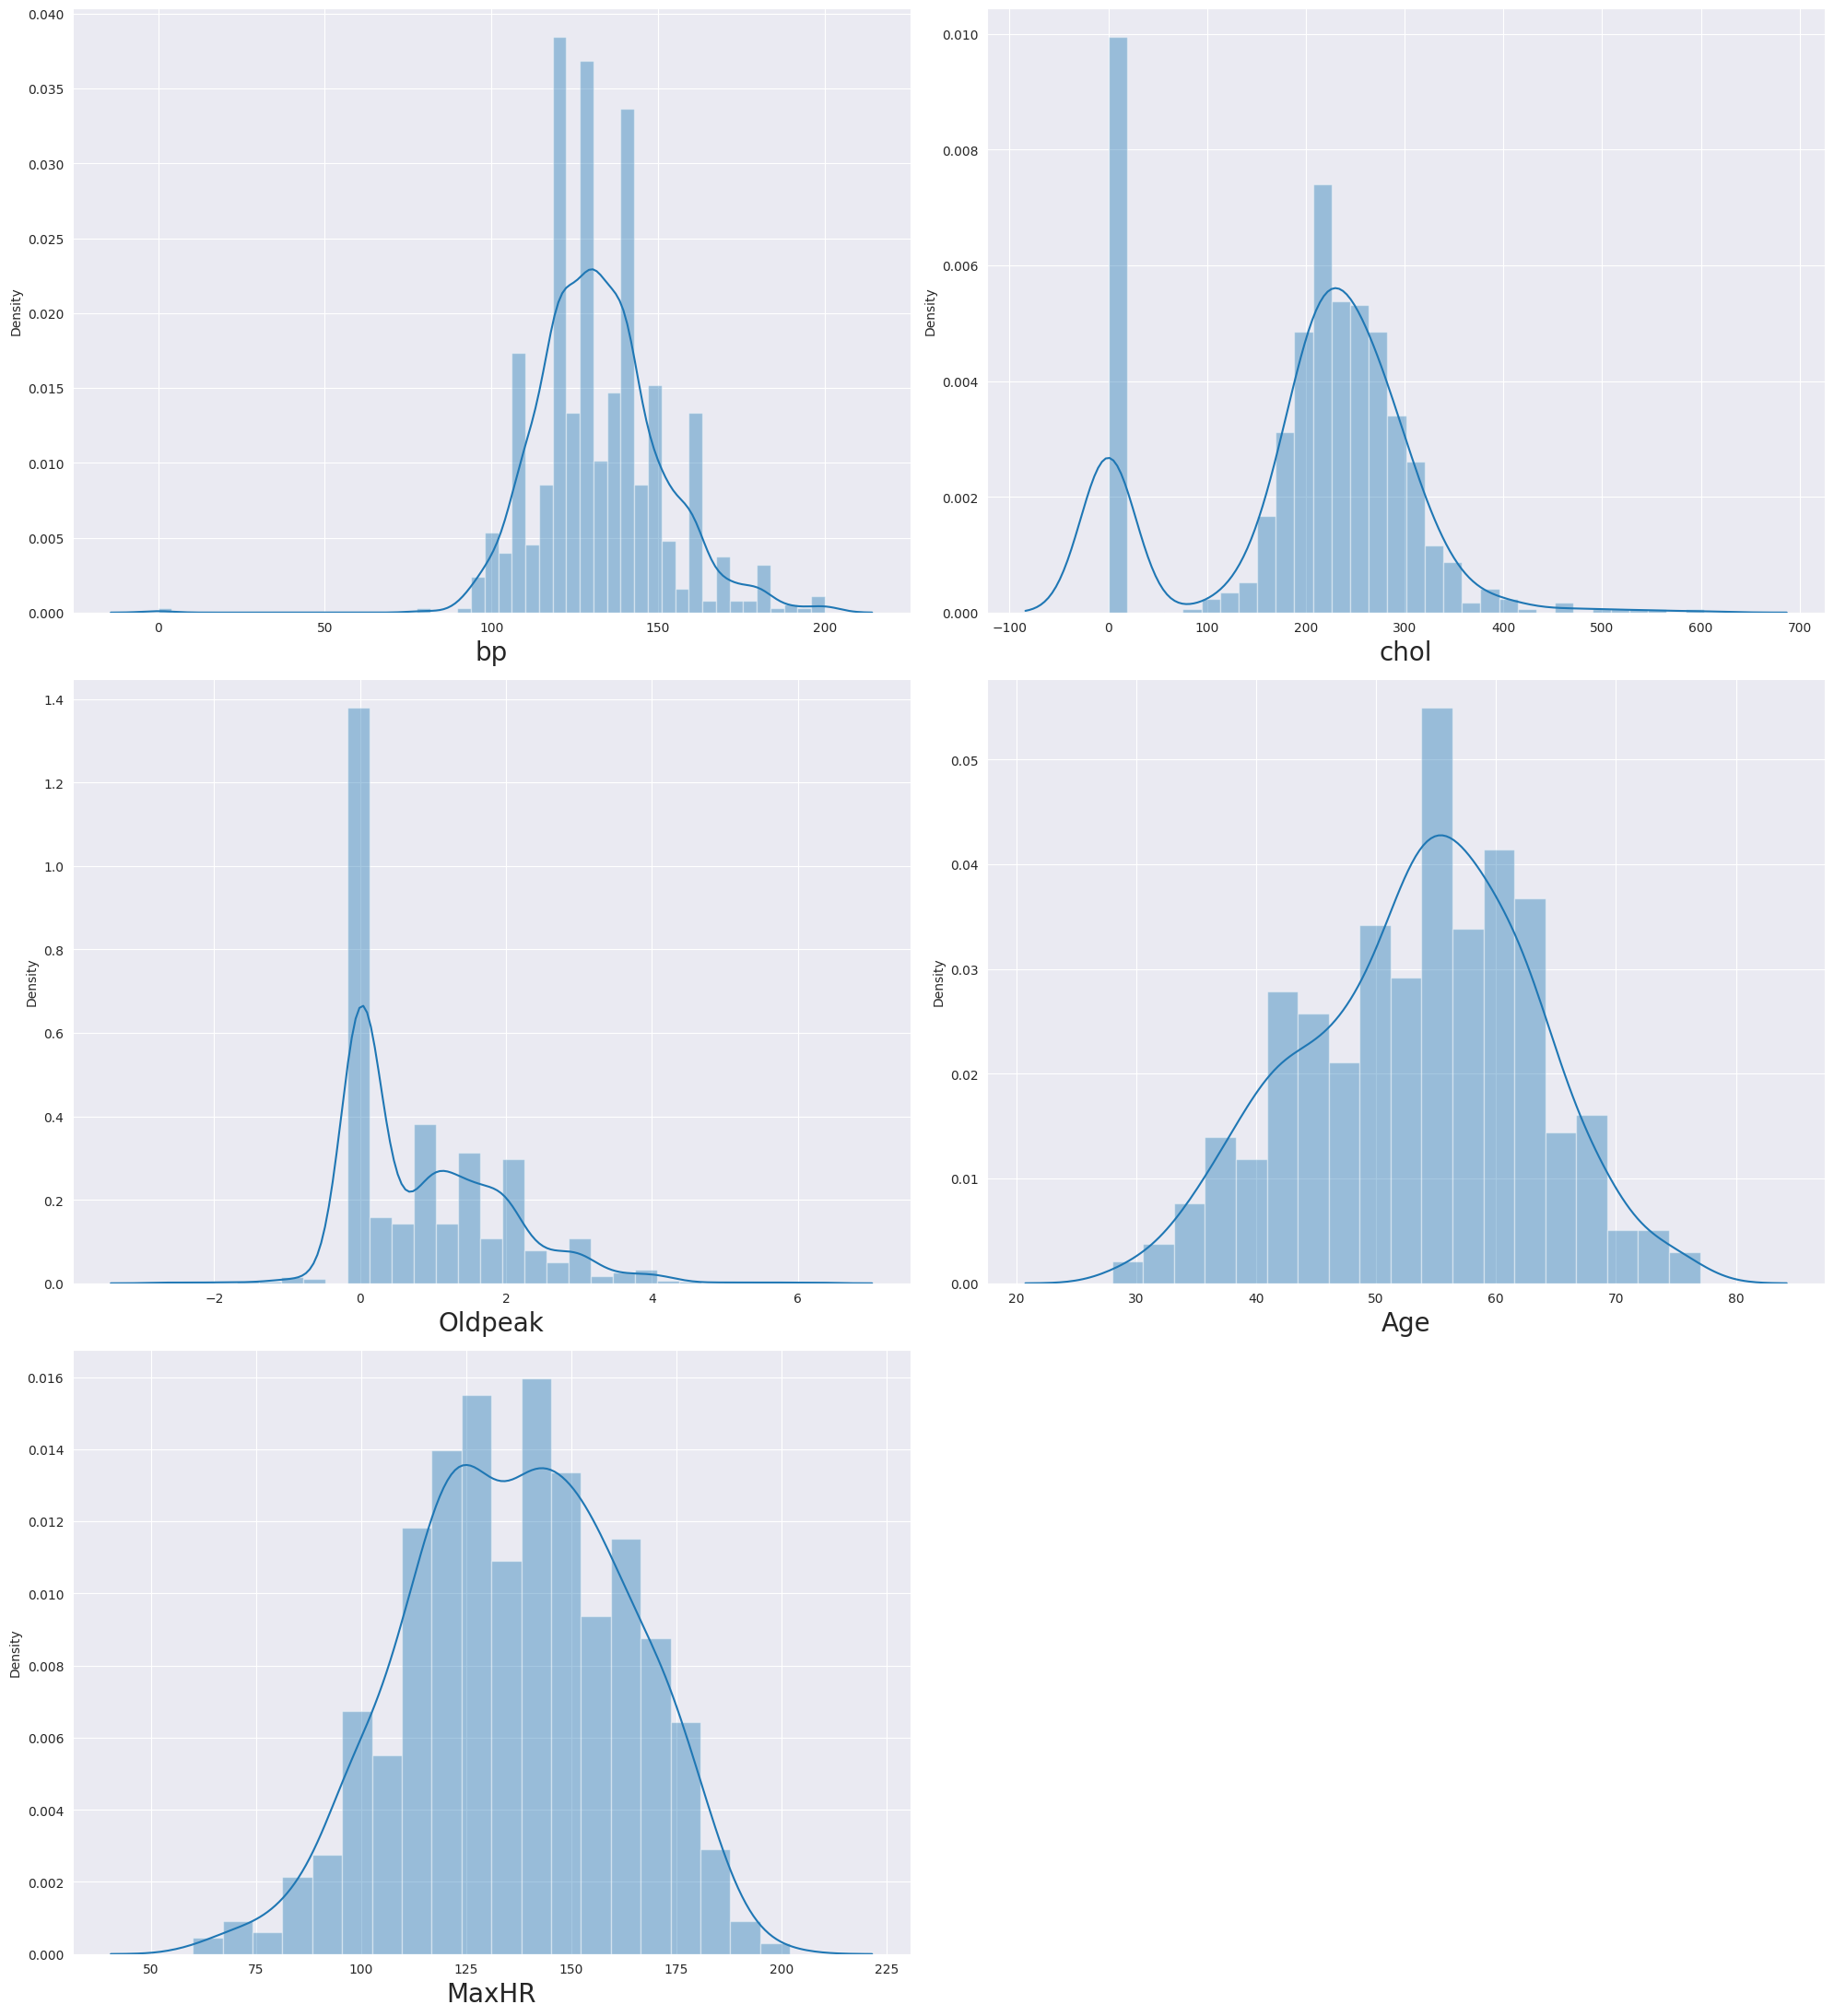

In [22]:
out = data[['bp','chol','Oldpeak','Age','MaxHR']]
sns.set_style('darkgrid')
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from  dataset 
    if plotno<=6:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 5 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.distplot(x=out[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()

Handling outlier in bp

In [23]:
from scipy import stats
iqr = stats.iqr(data['bp'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['bp'].quantile(0.25)  # first quantile
Q3 = data['bp'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 20.0
minimum limit 90.0
maximum limit 170.0


In [24]:
data.loc[data['bp'] < min_limit]
data.loc[data['bp'] > max_limit]

,Age,Sex,cpt,bp,chol,fbs,ecg,MaxHR,exang,Oldpeak,sop,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
372,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up,1


In [25]:

data.loc[data['bp'] > max_limit ,'bp']=np.median(data['bp'])

In [26]:
from scipy import stats
iqr = stats.iqr(data['chol'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['chol'].quantile(0.25)  # first quantile
Q3 = data['chol'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 93.5
minimum limit 33.0
maximum limit 407.25


In [27]:
data.loc[data['chol'] < min_limit]
data.loc[data['chol'] > max_limit]
len(data.loc[data['chol'] > max_limit])/180*100

6.111111111111111

In [28]:
from scipy import stats
iqr = stats.iqr(data['Oldpeak'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['Oldpeak'].quantile(0.25)  # first quantile
Q3 = data['Oldpeak'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 1.5
minimum limit -2.25
maximum limit 3.75


In [29]:
data.loc[data['Oldpeak'] < min_limit]
data.loc[data['Oldpeak'] > max_limit]

,Age,Sex,cpt,bp,chol,fbs,ecg,MaxHR,exang,Oldpeak,sop,HeartDisease
68,52,M,ASY,160,246,0,ST,82,Y,4.0,Flat,1
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
500,65,M,ASY,136,248,0,Normal,140,Y,4.0,Down,1
521,61,M,ASY,120,282,0,ST,135,Y,4.0,Down,1
537,74,M,ASY,150,258,1,ST,130,Y,4.0,Down,1
559,64,M,ASY,134,273,0,Normal,102,Y,4.0,Down,1
624,63,F,ASY,150,407,0,LVH,154,N,4.0,Flat,1
702,59,M,TA,130,270,0,LVH,145,N,4.2,Down,0
732,56,F,ASY,130,288,1,LVH,133,Y,4.0,Down,1
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1


In [30]:
data.loc[data['Oldpeak'] > max_limit,'Oldpeak'] = np.median(data['Oldpeak'])

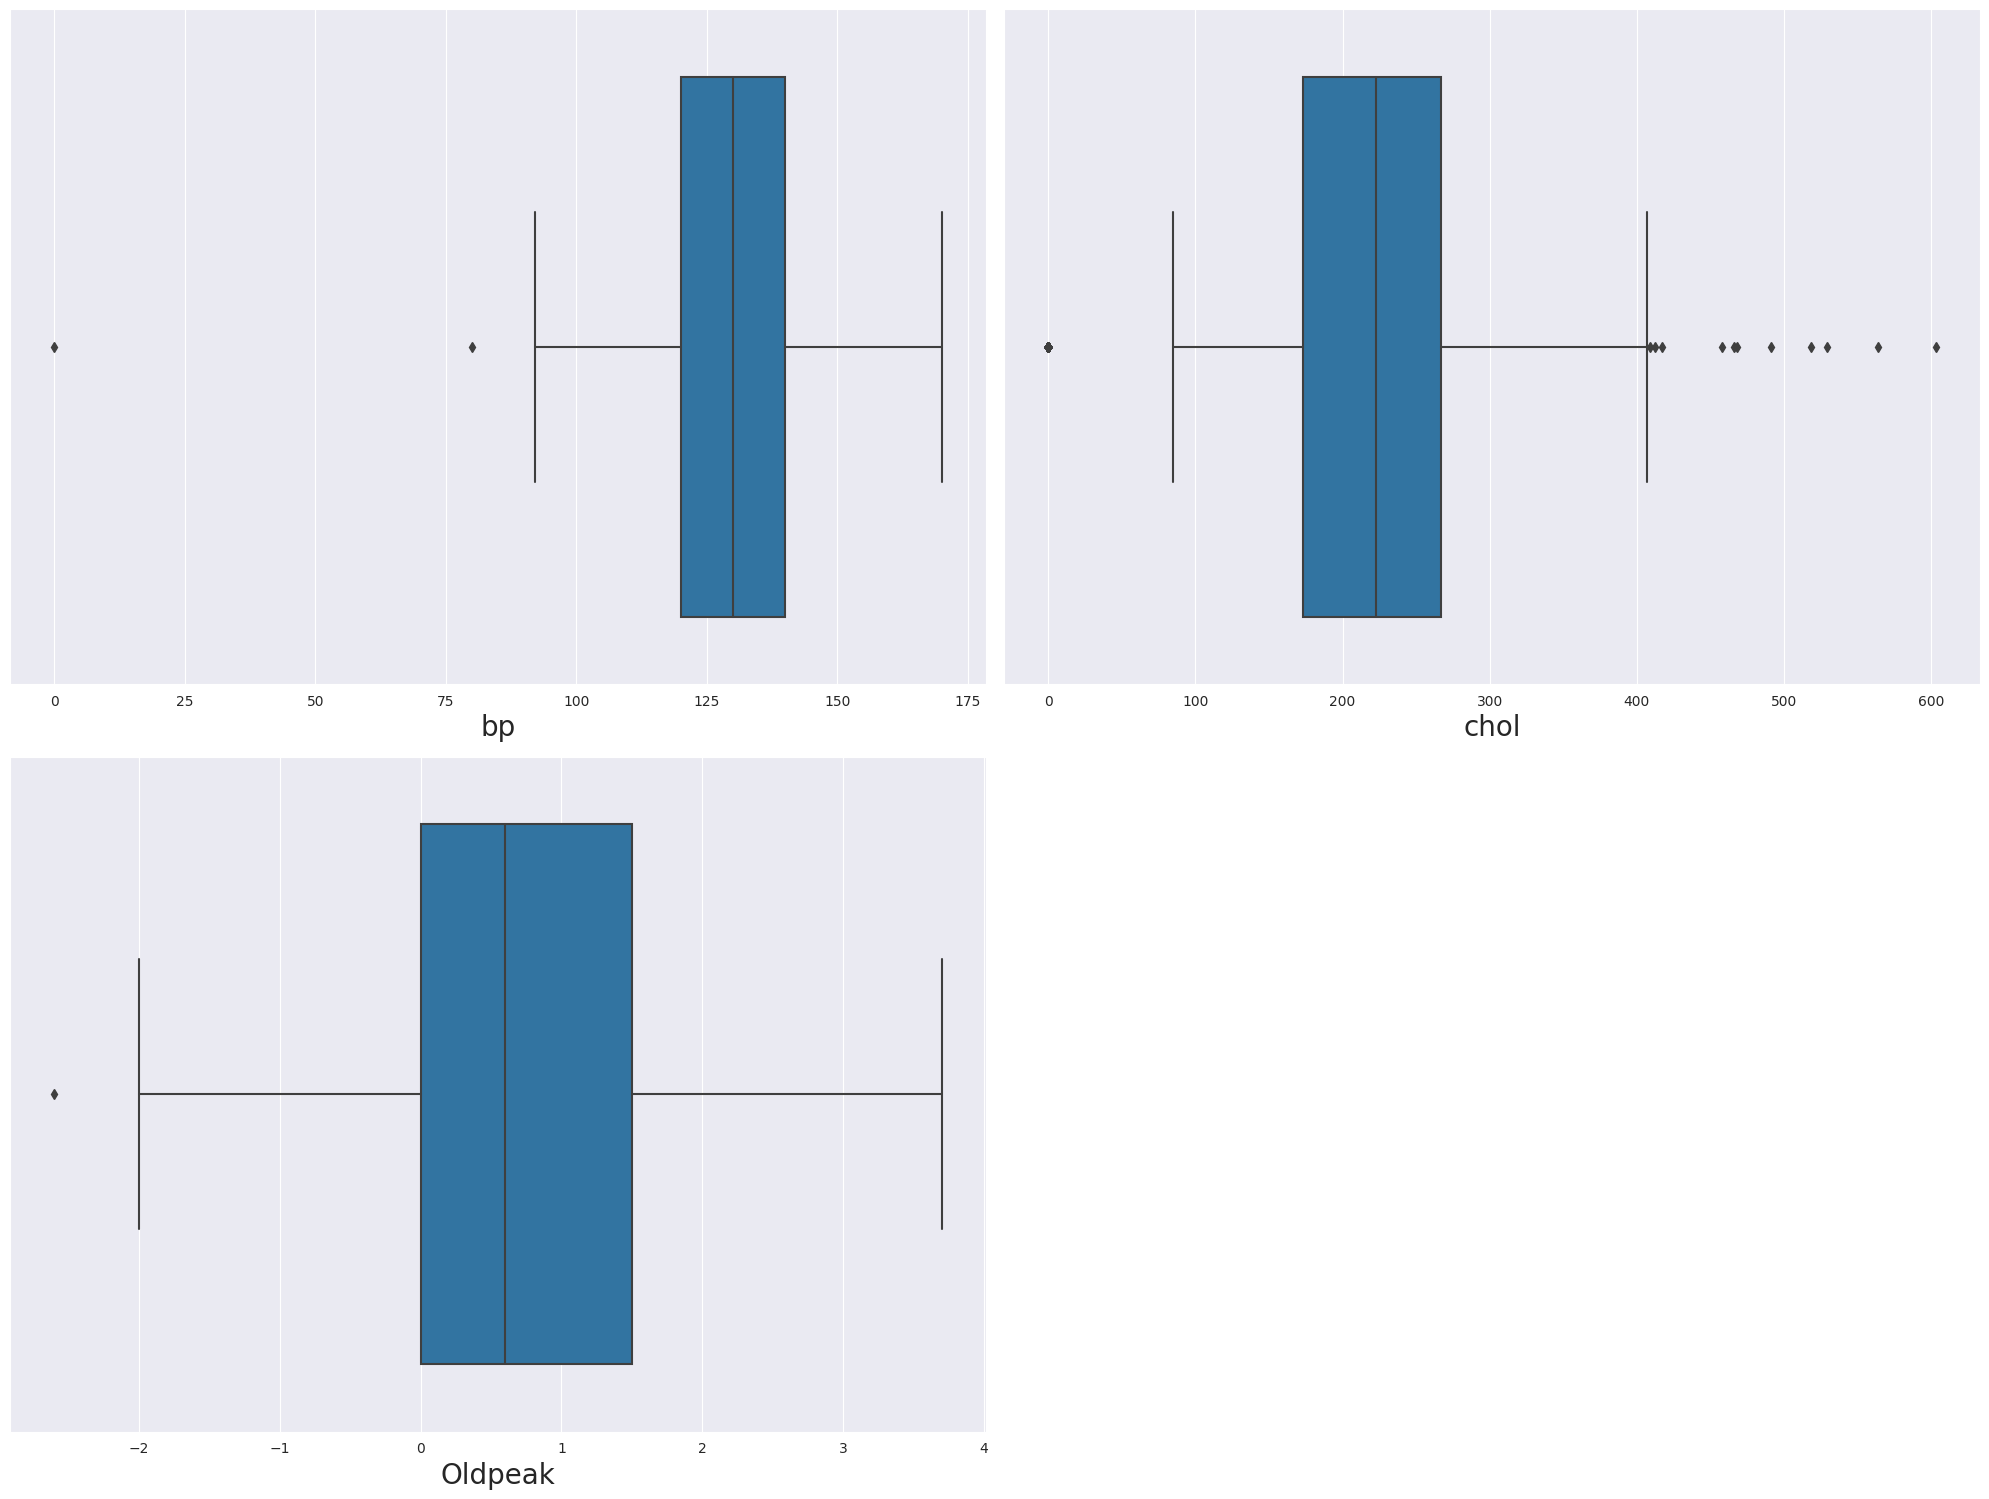

In [31]:
out = data[['bp','chol','Oldpeak']]
sns.set_style('darkgrid')
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from  dataset 
    if plotno<=6:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 5 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.boxplot(x=out[column]) # Plotting box plots
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()


STANDARD SCALING

    Standard scaling is used because of features are mesure in different units as well as some feature are followed normal distribution
    Standard scaling range : -3 to +3



In [32]:
from sklearn.preprocessing import StandardScaler

# Creating object
scale = StandardScaler()

# Scaling the feature 
data[['bp','chol','Oldpeak','Age','MaxHR']] = scale.fit_transform(data[['bp','chol','Oldpeak','Age','MaxHR']])

In [33]:
data.Sex = data.Sex.map({'M':1,'F':0,})
data.Sex.unique()

array([1, 0])

In [34]:
data.cpt = data.cpt.map({'TA':0,'ATA':1,'NAP':2,'ASY':3})
data.cpt.unique()

array([1, 2, 3, 0])

In [35]:
data.exang = data.exang.map({'N':0,'Y':1})
data.exang.unique()

array([0, 1])

In [36]:
data.sop = data.sop.map({'Up':0,'Flat':1,'Down':2})
data.sop.unique()

array([0, 1, 2])

In [37]:
data.ecg = data.ecg.map({'Normal':0,'ST':1,'LVH':2})
data.ecg.unique()

array([0, 1, 2])

In [38]:
data.head()

,Age,Sex,cpt,bp,chol,fbs,ecg,MaxHR,exang,Oldpeak,sop,HeartDisease
0,-1.433140,1,1,0.560528,0.825070,0,0,1.382928,0,-0.856665,0,0
1,-0.478484,0,2,1.790219,-0.171961,0,0,0.754157,0,0.180553,1,1
2,-1.751359,1,1,-0.054318,0.770188,0,1,-1.525138,0,-0.856665,0,0
3,-0.584556,0,3,0.437558,0.139040,0,0,-1.132156,1,0.699161,1,1
4,0.051881,1,2,1.175373,-0.034755,0,0,-0.581981,0,-0.856665,0,0


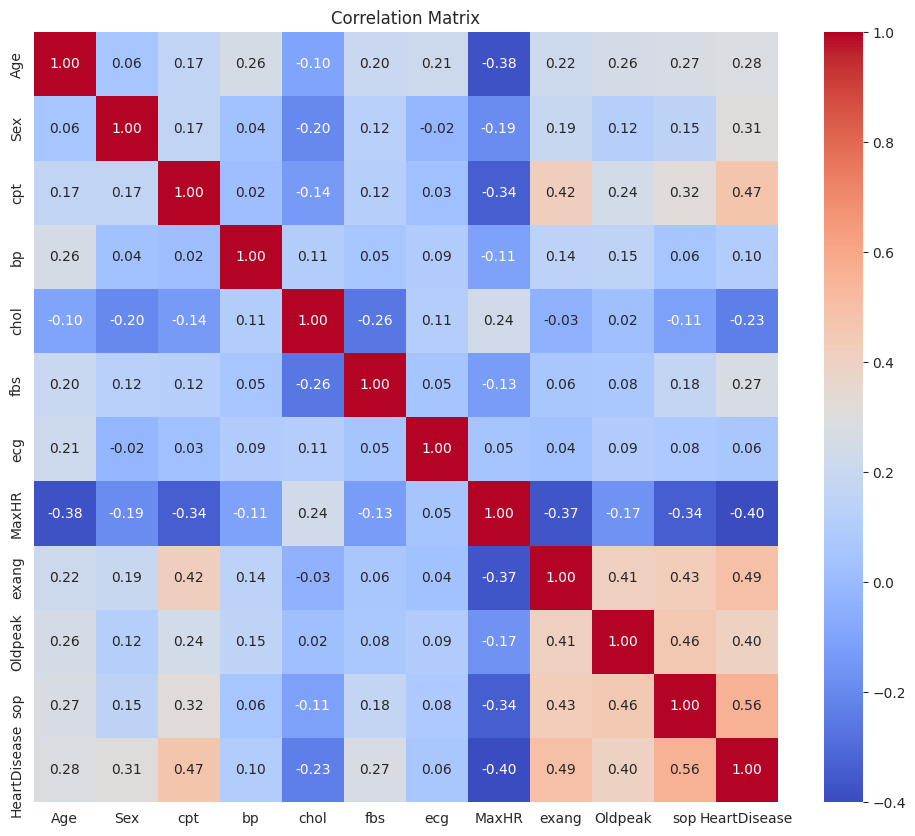

In [39]:
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [40]:
data.duplicated().sum()

0

this means no duplcate data

**Model**

In [41]:
x=data.drop("HeartDisease",axis=1)

y=data["HeartDisease"]

In [42]:
x

,Age,Sex,cpt,bp,chol,fbs,ecg,MaxHR,exang,Oldpeak,sop
0,-1.433140,1,1,0.560528,0.825070,0,0,1.382928,0,-0.856665,0
1,-0.478484,0,2,1.790219,-0.171961,0,0,0.754157,0,0.180553,1
2,-1.751359,1,1,-0.054318,0.770188,0,1,-1.525138,0,-0.856665,0
3,-0.584556,0,3,0.437558,0.139040,0,0,-1.132156,1,0.699161,1
4,0.051881,1,2,1.175373,-0.034755,0,0,-0.581981,0,-0.856665,0
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,0,-1.284009,0.596393,0,0,-0.188999,0,0.387996,1
914,1.536902,1,3,0.806466,-0.053049,1,0,0.164684,0,2.669874,1
915,0.370100,1,3,-0.054318,-0.620168,0,0,-0.857069,1,0.387996,1
916,0.370100,0,1,-0.054318,0.340275,0,2,1.461525,0,-0.856665,1


In [43]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=45)

In [45]:
x_train.shape

(734, 11)

In [46]:
x_test.shape

(184, 11)

In [47]:
y_train.shape

(734,)

In [48]:
y_test.shape

(184,)

**.LogisticRegression**

In [49]:
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation
log = LogisticRegression()

# Step:3 Fitting the training data
log.fit(x_train,y_train)

# Step:4 Prediction on test data
test_log_predict = log.predict(x_test)

# Step:5 Prediction on training data
train_log_predict = log.predict(x_train)

In [50]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report
log_train_accuracy = accuracy_score(train_log_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(train_log_predict,y_train))

Training accuracy of Logistic regression model 84.74114441416893
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       317
           1       0.87      0.86      0.87       417

    accuracy                           0.85       734
   macro avg       0.84      0.84      0.84       734
weighted avg       0.85      0.85      0.85       734



In [51]:
log_test_accuracy = accuracy_score(test_log_predict,y_test)
print("Testing accuracy ogof Logistic regession model",log_test_accuracy*100)
print("Logistic regression testing Classification report: \n",classification_report(test_log_predict,y_test))

Testing accuracy ogof Logistic regession model 83.69565217391305
Logistic regression testing Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        91
           1       0.84      0.84      0.84        93

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [52]:
recall_log = recall_score(test_log_predict,y_test)
recall_log*100

83.87096774193549

In [53]:
# Step:1 Create logistic regression object
log_reg1 = LogisticRegression()

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator=log_reg1,n_estimators=45)
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners

# Step:3 Fitting the training data
bagg.fit(x_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [54]:
bagg_recall = recall_score(bagg_predict,y_test)
print("Racall score after bagging",bagg_recall*100)

Racall score after bagging 84.78260869565217


KNeighboursClassifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = [] # Creating empty list
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_knn_predict = knn.predict(x_test)
    error_rate.append(np.mean(y_knn_predict != y_test))
print("Error rate:",error_rate)

Error rate: [0.22282608695652173, 0.1956521739130435, 0.17391304347826086, 0.21195652173913043, 0.17391304347826086, 0.17391304347826086, 0.14673913043478262, 0.15760869565217392, 0.14673913043478262, 0.16847826086956522]


In [56]:
# Step:3 Get nearst neighbors
knn1 = KNeighborsClassifier(n_neighbors=3)

# Step:4 Fitting the training data
knn1.fit(x_train,y_train)

# Step:5 Prediction on testing data
knn_test_predict = knn1.predict(x_test)

# Step:6 Prediction on training data
knn_train_predict = knn1.predict(x_train)

In [57]:
knn_train_accuracy = accuracy_score(knn_train_predict,y_train)
print("Training accuracy of knn model ",knn_train_accuracy)
print("Training classification report:\n",classification_report(knn_train_predict,y_train))

Training accuracy of knn model  0.9019073569482289
Training classification report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       311
           1       0.92      0.91      0.91       423

    accuracy                           0.90       734
   macro avg       0.90      0.90      0.90       734
weighted avg       0.90      0.90      0.90       734



In [58]:
knn_test_accuracy = accuracy_score(knn_test_predict,y_test)
print("Testing accuracy of knn model",knn_test_accuracy*100)
print("Testing classification report: \n",classification_report(knn_test_predict,y_test))

Testing accuracy of knn model 82.6086956521739
Testing classification report: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        91
           1       0.83      0.83      0.83        93

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



In [59]:
recall_knn = recall_score(knn_test_predict,y_test)
recall_knn*100

82.79569892473118

**Random Forest Classifier**

In [60]:
# Step:1 importing libary and creating object
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree

# Step:2 fitting training data
rf.fit(x_train,y_train)

# Step:3 Prediction on testing data
rf_test_predict = rf.predict(x_test)

# Step:4 Prediction on training data
rf_train_predict = rf.predict(x_train)

In [61]:
rf_train_accuracy = accuracy_score(rf_train_predict,y_train)
print("Training accuracy of random forest",rf_train_accuracy)
print("Classification report of training: \n",classification_report(rf_train_predict,y_train))

Training accuracy of random forest 1.0
Classification report of training: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       415

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [62]:
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

Testing accuracy of random forest 88.04347826086956
Classification report of testing: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        89
           1       0.89      0.87      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [63]:
from sklearn.model_selection import RandomizedSearchCV  
#In random forest we are not used grid search CV because of memory reason.

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['auto', 'sqrt'] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] #Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [2,3,5,10] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4,5]  #Min number of data point allowed in leaf node

# Step:2 Creating dictionary of paramter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Step:3 Object creation
rf_clf = RandomForestClassifier(random_state=42) #Provide random state because select rows and columns randomly

# Step:4 Create Random search CV with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf,scoring='f1',param_distributions=random_grid,
                           n_iter=20,cv=2,verbose=2,random_state=42,n_jobs=-1)

# Step:5 Fitting the training data
rf_cv.fit(x_train,y_train)

# Step:6 Get best parameter
rf_best_params = rf_cv.best_params_
print(f"Best parameter: {rf_best_params}")

Fitting 2 folds for each of 20 candidates, totalling 40 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best parameter: {'n_estimators': 1366, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}


In [64]:
# Step:7 Create object and place the best paramter
rf_clf1 = RandomForestClassifier(**rf_best_params)

# Step:8 Fitting the training data
rf_clf1.fit(x_train,y_train)

# Step:9 Prediction on test data
rf_clf1_predict = rf_clf1.predict(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [65]:
rf_accuracy = accuracy_score(rf_clf1_predict,y_test)
print("Accuracy after hyperparameter tunning",rf_accuracy*100)
print("Classification report: \n",classification_report(rf_clf1_predict,y_test))

Accuracy after hyperparameter tunning 87.5
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        84
           1       0.91      0.85      0.88       100

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [66]:
rf_recall_score = recall_score(rf_clf1_predict,y_test)
print("Recall score:",rf_recall_score*100)

Recall score: 85.0


**XGBoost**

In [67]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Step:2 Fitting the training data
xgb.fit(x_train,y_train)

# Step:3 Prediction on training data
xgb_train_predict = xgb.predict(x_train)

# Step:4 Prediction on testing data
xgb_test_predict = xgb.predict(x_test)

In [68]:
xgb_train_accuracy = accuracy_score(xgb_train_predict,y_train)
print("Training accuracy of xgb model",xgb_train_accuracy)
print("Classifiaction report on training: \n",classification_report(xgb_train_predict,y_train))

Training accuracy of xgb model 1.0
Classifiaction report on training: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       415

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [69]:
xgb_test_accuracy = accuracy_score(xgb_test_predict,y_test)
print("Testing accuracy of xgb model",xgb_test_accuracy*100)
print("Classification report on testing: \n",classification_report(xgb_test_predict,y_test))

Testing accuracy of xgb model 87.5
Classification report on testing: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87        88
           1       0.89      0.86      0.88        96

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [70]:
XGB2 = XGBClassifier(reg_lambda=12.8,reg_alpha=0.4,n_estimators=115,max_depth=9,learning_rate=0.7,gamma=0.1)

# Step:7 Fitting the training data
XGB2.fit(x_train,y_train)

# Step:8 Prediction on testing data
XGB_prediction = XGB2.predict(x_test)

In [71]:
XGB_recall = recall_score(XGB_prediction,y_test)
print("Recall Score",XGB_recall*100)

Recall Score 85.71428571428571


In [72]:
data.head()

,Age,Sex,cpt,bp,chol,fbs,ecg,MaxHR,exang,Oldpeak,sop,HeartDisease
0,-1.433140,1,1,0.560528,0.825070,0,0,1.382928,0,-0.856665,0,0
1,-0.478484,0,2,1.790219,-0.171961,0,0,0.754157,0,0.180553,1,1
2,-1.751359,1,1,-0.054318,0.770188,0,1,-1.525138,0,-0.856665,0,0
3,-0.584556,0,3,0.437558,0.139040,0,0,-1.132156,1,0.699161,1,1
4,0.051881,1,2,1.175373,-0.034755,0,0,-0.581981,0,-0.856665,0,0


In [73]:
data_input = np.array([41,0,1,105,198,0,1,168,0,0,2]).reshape(1,-1)


# Prediction with a person without heart disease data

#data_input = np.array([60,1,0,130,253,0,1,144,1,1.4,2,1,3]).reshape(1,-1)
#data_input = np.array([61,1,0,148,203,0,1,161,0,0,2,1,3]).reshape(1,-1)

# making prediction
prediction = xgb.predict(data_input)
print(prediction)

if(prediction[0] == 0):
  print('The Person does not have a heart disease')
else:
  print('The Person has a heart disease')

[1]
The Person has a heart disease


In [74]:
import pickle

file = open("Heart_Disease_Prediction.pkl","wb")
